<div style="border-top: 3px solid #2E8B57; border-bottom: 3px solid #2E8B57; padding: 10px 0;">
  <h2 style="text-align: center; color: #2E8B57; margin: 0;">
    Fit app project
  </h2>
</div>

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/Alop89/fit_app_data_analysis/main/images_/pexels-victorfreitas-841130.jpg" alt="Persona levantando pesas" width="700"/>
</div>




##  Busines task:

This project's objective is to analyze data from a single health monitoring device to learn more about how users are utilizing it. The findings will inform marketing plans for the company's expansion and improved customer service. Data and graphs that assist stakeholders in understanding consumer behavior, key trends, two marketing strategies, and two actions each will be included in the final report. 

## Questions

These three questions will guide all the processes of the data analysis:
1. What are some __trends in smart device usage__?
2. How could these __trends apply to customers__?
3. How could these __trends help influence marketing strategy__?

## Deliverables

 These five deliverables will be generated:
 
 1. A description of all data sources used.
 2. Documentation of any cleaning or manipulation of data.
 3. A summary of the analysis.
 4. Supporting visualizations and key findings.
 5. Top high-level content recommendations based on your analysis. 

## Description of all data sources used

The information about the data set used in this project, is available in the following address: https://www.kaggle.com/datasets/arashnic/fitbit

Summary of the data:
* __Description__: This dataset was produced between December 3, 2016, and December 5, 2016, by participants in a dispersed survey conducted by Amazon Mechanical Turk. The submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep tracking, was approved by thirty qualified Fitbit users.
* __Licence__: CC0: Public Domain
* **Last update**: Annually (Updated a year ago)

## Documentation of any cleaning or manipulation of the data

Every step of the data analysis process will include documentation of data tampering. 

## Data analysis process

### Libraries import

In [1]:
# libraries import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading

In [2]:
# data loading 

activity = pd.read_csv('https://raw.githubusercontent.com/Alop89/fit_app_data_analysis/refs/heads/main/data_/dailyActivity_merged.csv')
sleep = pd.read_csv('https://raw.githubusercontent.com/Alop89/fit_app_data_analysis/refs/heads/main/data_/minuteSleep_merged.csv')
weight_loss = pd.read_csv('https://raw.githubusercontent.com/Alop89/fit_app_data_analysis/refs/heads/main/data_/weightLogInfo_merged.csv')

**Data description**

| data | description |
|------|-------------|
| activity | contains all the data related to the activity of the customers, including info about steps, distance, activity classification, sedentary time, and calories expense |
| sleep | contains all the data related to sleep date and time |
| weight_loss | contains all the data related to date and time of the weight measures of customers |

### Data exploration

#### Activity 

In [3]:
# activity 

activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [4]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

**Notes**:
* _Float columns_ with more than 2 decimals will be rounded to only two decimals (TotalDistance, TrackerDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance). 
* _ActivityDate_ will be set as datetime values.
* No missing values. 

In [5]:
# float columns round 

float_cols = ['TotalDistance', 'TrackerDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']
activity[float_cols] = activity[float_cols].round(2)

In [6]:
# change ActivityDate to date only 

activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])

In [7]:
# search for duplicates in activity data
duplicates = activity[activity.duplicated()]
duplicates_count = duplicates.shape[0]
duplicates_count

# An alternative way to check for duplicates
# activity.duplicated().sum()

0

**Notes**:

No duplicated rows were found. 

In [89]:
# Number of unique users
unique_users = activity['Id'].nunique()
print(f"Number of unique users in activity data: {unique_users}")   

Number of unique users in activity data: 35


**Notes** :

We have a total of 35 unique users. 

In [62]:
# Describe activity data, without Id and ActivityDate columns. 
activity.describe().drop(columns=['Id','ActivityDate']).round(2)

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Month
count,457.00,457.00,457.00,457.00,457.00,457.00,457.00,457.00,457.00,457.00,457.00,457.00,457.00,457.00
mean,6546.56,4.66,4.61,0.18,1.18,0.48,2.89,0.00,16.62,13.07,170.07,995.28,2189.45,3.84
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32.00,0.00,3.00
25%,1988.00,1.41,1.28,0.00,0.00,0.00,0.87,0.00,0.00,0.00,64.00,728.00,1776.00,4.00
50%,5986.00,4.09,4.09,0.00,0.00,0.02,2.93,0.00,0.00,1.00,181.00,1057.00,2062.00,4.00
75%,10198.00,7.16,7.11,0.00,1.31,0.67,4.46,0.00,25.00,16.00,257.00,1285.00,2667.00,4.00
max,28497.00,27.53,27.53,6.73,21.92,6.40,12.51,0.10,202.00,660.00,720.00,1440.00,4562.00,4.00
std,5398.49,4.08,4.07,0.85,2.49,0.83,2.24,0.01,28.92,36.21,122.21,337.02,815.48,0.37


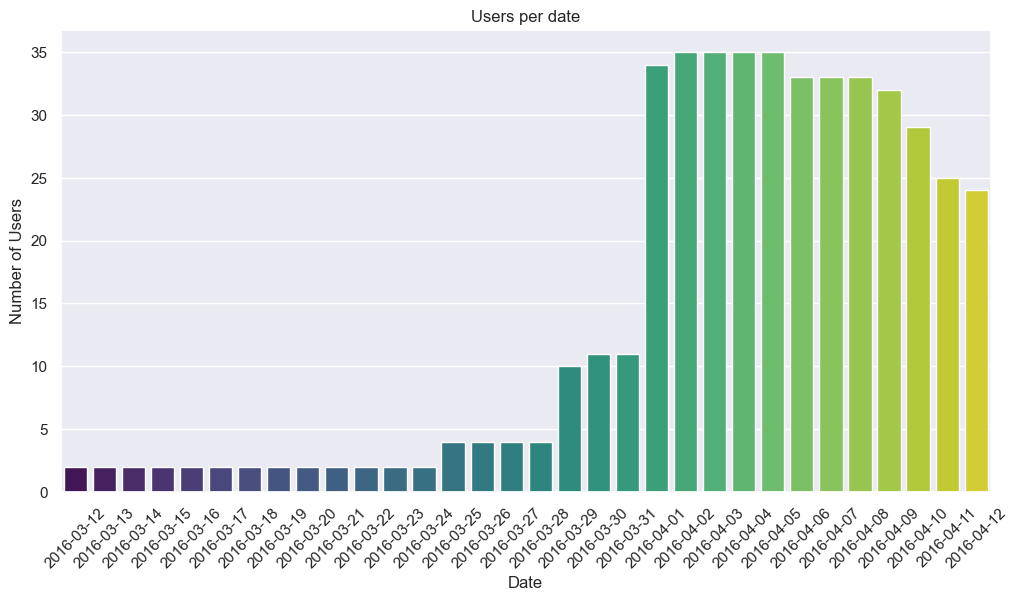

In [85]:
# Users per date 
users_per_date = activity.groupby('ActivityDate')['Id'].nunique().reset_index()
users_per_date.rename(columns={'Id': 'Users'}, inplace=True)

# Plot users per date
plt.figure(figsize=(12, 6))    
sns.set_theme(style="darkgrid") 
sns.barplot(x='ActivityDate', y='Users', data=users_per_date, palette='viridis', hue='ActivityDate')
plt.title('Users per date')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

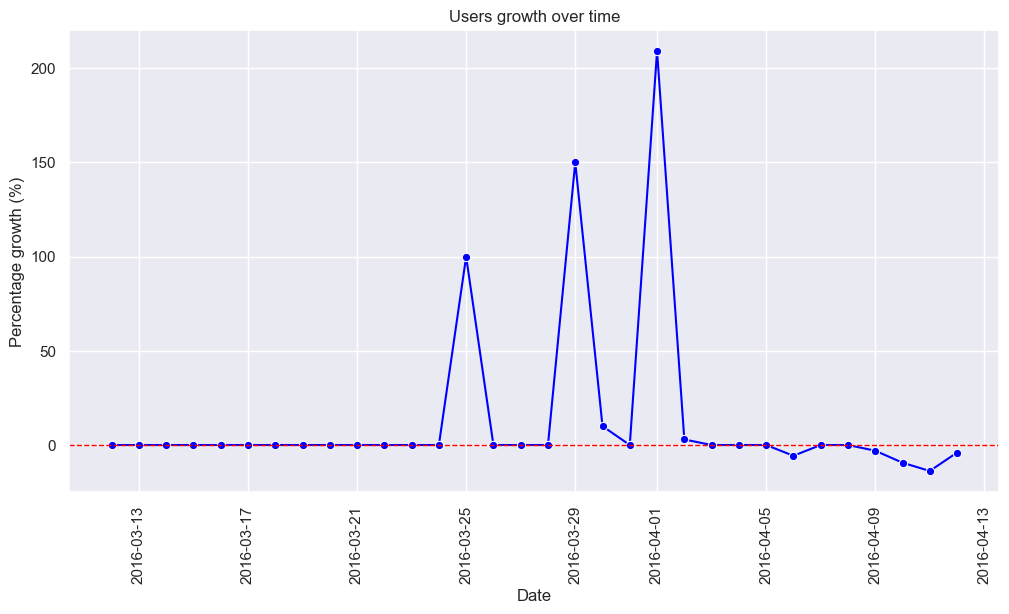

In [67]:
# Users growth 
users_per_date['%_growth'] = users_per_date['Users'].pct_change()* 100
users_per_date['%_growth'] = users_per_date['%_growth'].fillna(0).round(2)


# grpahh users growth   
plt.figure(figsize=(12, 6))    
sns.set_theme(style="darkgrid") 
sns.lineplot(x='ActivityDate', y='%_growth', data=users_per_date, marker='o', color='blue')
plt.title('Users growth over time')
plt.xlabel('Date')
plt.ylabel('Percentage growth (%)')
plt.xticks(rotation=90)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()




In [68]:

users_sorted = users_per_date.sort_values(by='%_growth', ascending=False)
print(users_sorted.head(3))
print()
print(users_sorted.tail(3))

   ActivityDate  Users  %_growth
20   2016-04-01     34    209.09
17   2016-03-29     10    150.00
13   2016-03-25      4    100.00

   ActivityDate  Users  %_growth
25   2016-04-06     33     -5.71
29   2016-04-10     29     -9.38
30   2016-04-11     25    -13.79


**Notes**:


* Three dates show a __major increase in the percentage of users__: 
    * 2016-03-25 -> 100%.
    * 2016-03-29 -> 150%. 
    * 2016-04-01 -> 209%
    
*  Three dates show a __major decrease in the percentage of users__:
    * 2016-04-06 -> -5.71%. 
    * 2016-04-10 -> -9.38%. 
    * 2016-04-11 -> -13.79%. 


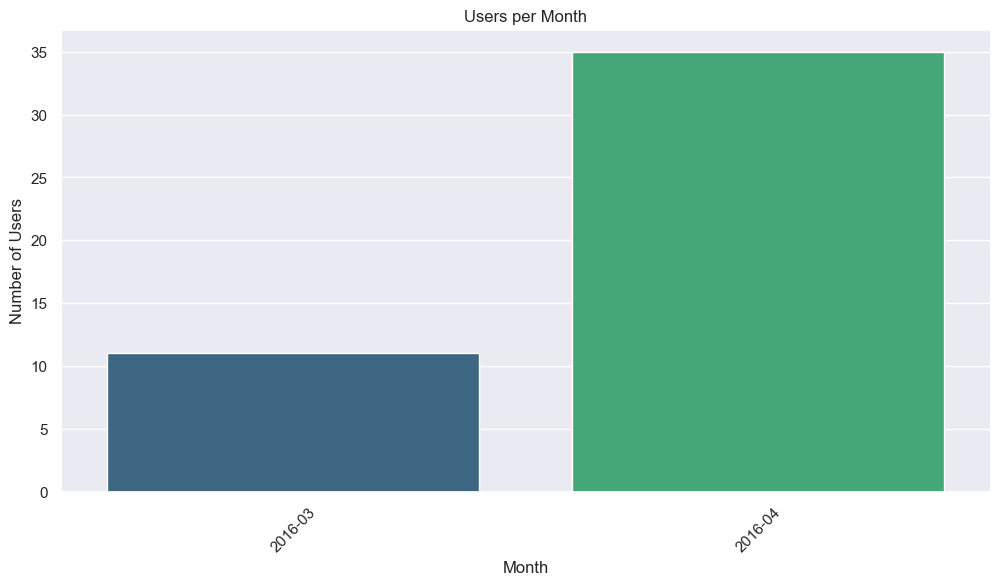

In [69]:
# Users per month 
users_per_month = activity.groupby(activity['ActivityDate'].dt.to_period('M'))['Id'].nunique().reset_index()
users_per_month.rename(columns={'Id': 'Users'}, inplace=True)

# Plot users per month
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.barplot(x='ActivityDate', y='Users', data=users_per_month, palette='viridis', hue='ActivityDate')
plt.title('Users per Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

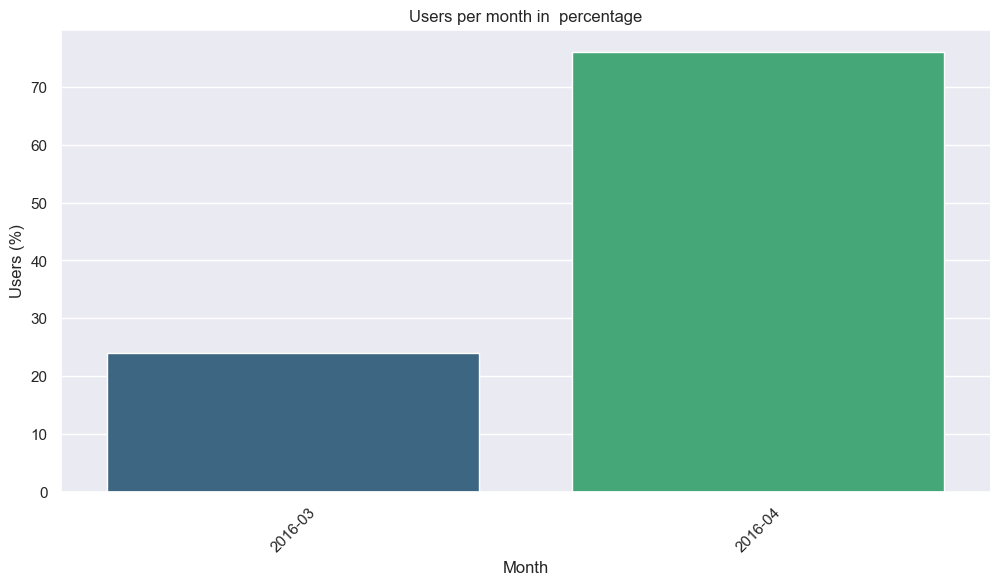

In [72]:
# Users per month in percentage
users_per_month['Percentage'] = round((users_per_month['Users'] / users_per_month['Users'].sum()) * 100,2) 


# Plot users per month in percentage
plt.figure(figsize=(12, 6))     
sns.set_theme(style="darkgrid")
sns.barplot(x='ActivityDate', y='Percentage', data=users_per_month, palette='viridis', hue='ActivityDate')
plt.title('Users per month in  percentage')
plt.xlabel('Month')
plt.ylabel('Users (%)')
plt.xticks(rotation=45)
plt.show()

In [86]:
users_per_month['Growth_%'] = users_per_month['Users'].pct_change() * 100
users_per_month['Growth_%'] = users_per_month['Growth_%'].fillna(0).round(2)


In [88]:
# Answers automation for reporting. 
growth_ = users_per_month['Growth_%'].to_list()[-1]
increase_users = users_per_month['Users'].to_list()[-1] - users_per_month['Users'].to_list()[0]
increase_users_perc =  round(users_per_month['Percentage'].to_list()[-1] - users_per_month['Percentage'].to_list()[0], 2) 

print(f"The user growth in April is {growth_}%.")
print(f"The increase in the user from March to April is {increase_users} users, which is a {increase_users_perc}% increase.")
print(f"The user growth from March to April is =  {growth_}%.")


The user growth in April is 218.18%.
The increase in the user from March to April is 24 users, which is a 52.18% increase.
The user growth from March to April is =  218.18%.


### Sleep

In [9]:
sleep.head()

,Id,date,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637


In [10]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198559 entries, 0 to 198558
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      198559 non-null  int64 
 1   date    198559 non-null  object
 2   value   198559 non-null  int64 
 3   logId   198559 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.1+ MB


__Notes__ : 

* Total registres = 198,559. 
* Colum date will be set as datetime type. 

In [11]:
sleep['date'] = pd.to_datetime(sleep['date'].str.strip(), format='mixed')

In [12]:

print(sleep['Id'].unique())
print()
print("Total number of IDs registred = {}".format(sleep['Id'].nunique()))

[1503960366 1644430081 1844505072 1927972279 2022484408 2026352035
 2347167796 3977333714 4020332650 4319703577 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6775888955 6962181067
 7007744171 7086361926 8053475328 8378563200 8792009665]

Total number of IDs registred = 23


**Notes**:

* A total number of 23 unique IDs in the sleep dataframe.
* We have 12 fewer unique IDs compared with the activity dataframe. This could indicate that not all users are wearing the device for sleep tracking. 

### Weight loss

In [13]:
weight_loss.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000


In [14]:
weight_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              33 non-null     int64  
 1   Date            33 non-null     object 
 2   WeightKg        33 non-null     float64
 3   WeightPounds    33 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             33 non-null     float64
 6   IsManualReport  33 non-null     bool   
 7   LogId           33 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 2.0+ KB
